In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_poke = pd.read_excel('pokemon_data_tratado.xlsx')
df_poke

,Unnamed: 0,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Is_legendary
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,0
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,0
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,0
3,3,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,0
4,4,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1030,618,Stunfisk Galarian Stunfisk,Ground,Steel,471,109,81,99,66,84,32,0
1031,1031,628,Braviary Hisuian Braviary,Psychic,Flying,510,110,83,70,112,70,65,0
1032,1032,705,Sliggoo Hisuian Sliggoo,Steel,Dragon,452,58,75,83,83,113,40,0
1033,1033,706,Goodra Hisuian Goodra,Steel,Dragon,600,80,100,100,110,150,60,0


In [3]:
df_poke.dtypes

Unnamed: 0       int64
Pokedex ID       int64
Name            object
Type_1          object
Type_2          object
Total            int64
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Is_legendary     int64
dtype: object

In [4]:
df_poke.isnull().sum()

Unnamed: 0      0
Pokedex ID      0
Name            0
Type_1          0
Type_2          0
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Is_legendary    0
dtype: int64

In [5]:
x = df_poke.drop(labels='Is_legendary', axis=1)
y = df_poke['Is_legendary'].values

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column_name in x:
    column_dtype = x[column_name].dtype
    if column_dtype == 'object':
        x[column_name] = label_encoder.fit_transform(x[column_name])

df_testinho = pd.DataFrame(x)
display(df_testinho)

,Unnamed: 0,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0,1,91,9,13,318,45,49,49,65,65,45
1,1,2,427,9,13,405,60,62,63,80,80,60
2,2,3,959,9,13,525,80,82,83,100,100,80
3,3,4,118,6,6,309,39,52,43,60,50,65
4,4,5,119,6,6,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1030,618,864,10,16,471,109,81,99,66,84,32
1031,1031,628,82,14,7,510,110,83,70,112,70,65
1032,1032,705,815,16,2,452,58,75,83,83,113,40
1033,1033,706,347,16,2,600,80,100,100,110,150,60


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector

preprocessador = ColumnTransformer(verbose_feature_names_out = False, remainder = 'passthrough', transformers = [('Standard', StandardScaler(), make_column_selector(dtype_include=['int']))])

x_pre = preprocessador.fit_transform(x)
display(x_pre)

array([[-1.73037814, -1.65931559, -1.42580481, ..., -0.1591169 ,
        -0.17084737, -0.78262369],
       [-1.72703118, -1.65592545, -0.30122637, ...,  0.34533274,
         0.41454336, -0.26484338],
       [-1.72368422, -1.6525353 ,  1.47935616, ...,  1.01793228,
         1.19506433,  0.42553037],
       ...,
       [ 1.72368422,  0.72734429,  0.99739397, ...,  0.44622267,
         1.70240296, -0.95521712],
       [ 1.72703118,  0.73073444, -0.56898314, ...,  1.35423204,
         3.14636676, -0.26484338],
       [ 1.73037814,  0.79175699, -1.09780276, ...,  0.84978239,
         0.99993409, -0.26484338]])

In [8]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_pre,y,random_state=42, test_size=0.3)

In [9]:
from sklearn import tree

classificador_gini = tree.DecisionTreeClassifier(criterion='gini')

classificador_gini.fit(x_treino, y_treino)

DecisionTreeClassifier()

[Text(0.4921875, 0.9375, 'Total <= 1.303\ngini = 0.159\nsamples = 724\nvalue = [661, 63]\nclass = 0'),
 Text(0.1953125, 0.8125, 'Attack <= -1.631\ngini = 0.015\nsamples = 649\nvalue = [644, 5]\nclass = 0'),
 Text(0.0625, 0.6875, 'Attack <= -1.682\ngini = 0.159\nsamples = 23\nvalue = [21, 2]\nclass = 0'),
 Text(0.03125, 0.5625, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]\nclass = 0'),
 Text(0.09375, 0.5625, 'Speed <= -1.076\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = 1'),
 Text(0.0625, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.125, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.328125, 0.6875, 'HP <= 1.125\ngini = 0.01\nsamples = 626\nvalue = [623, 3]\nclass = 0'),
 Text(0.21875, 0.5625, 'Type_2 <= 1.5\ngini = 0.004\nsamples = 557\nvalue = [556, 1]\nclass = 0'),
 Text(0.1875, 0.4375, 'gini = 0.0\nsamples = 502\nvalue = [502, 0]\nclass = 0'),
 Text(0.25, 0.4375, 'HP <= 0.489\ngini = 0.036\nsamples = 55\nvalue = [54, 1]\nclass = 

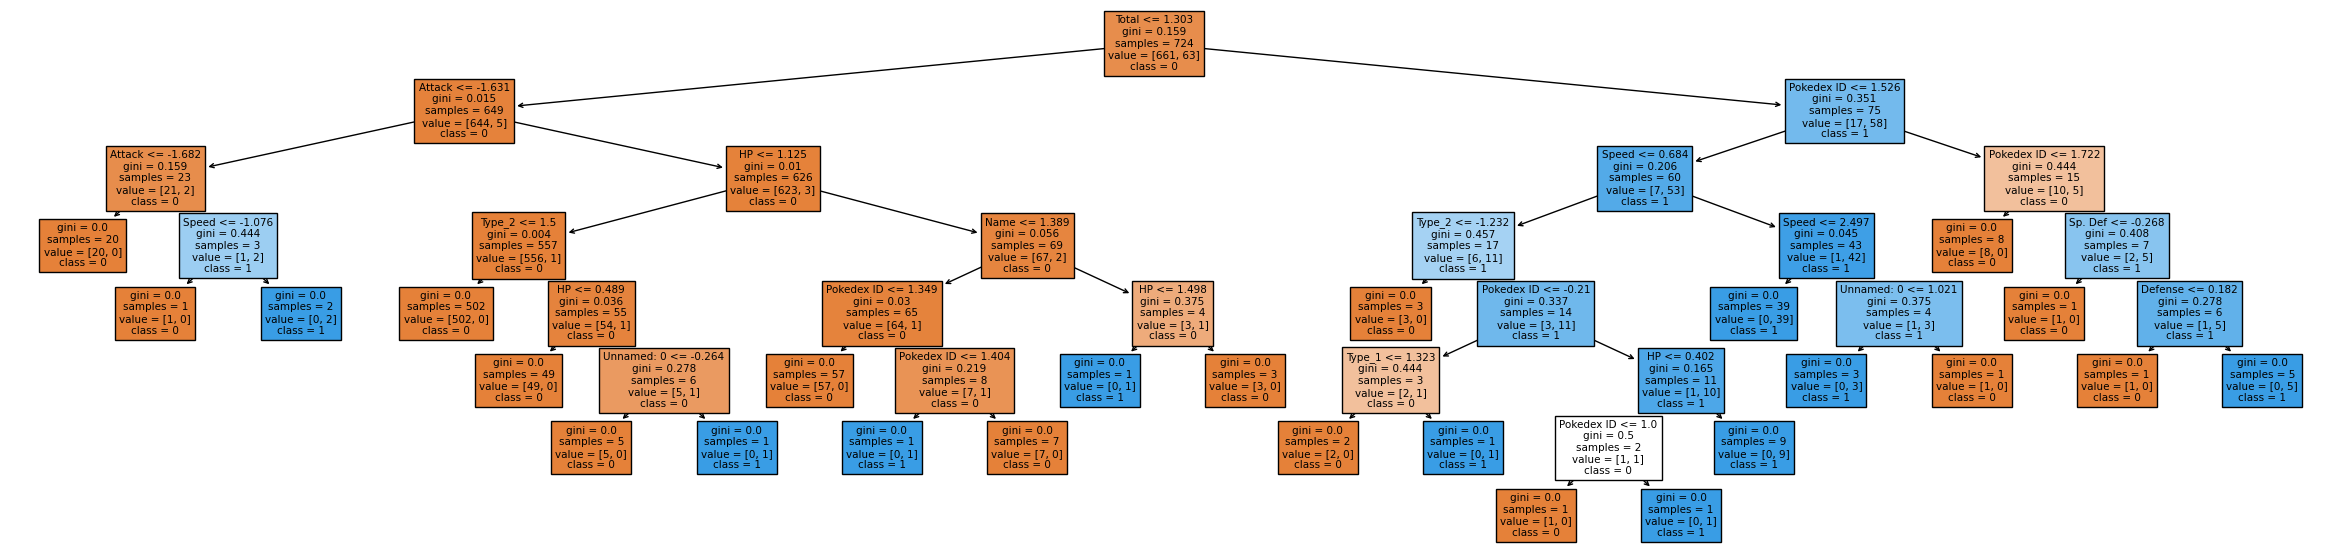

In [10]:
plt.figure(figsize=(30,7))
tree.plot_tree(
    classificador_gini,
    feature_names=x.columns.astype(str),
    class_names=classificador_gini.classes_.astype(str),
    filled=True
)

In [11]:
from sklearn.metrics import accuracy_score

resp_treino_gini = classificador_gini.predict(x_treino)

print('Gini:', accuracy_score(y_treino, resp_treino_gini))

Gini: 1.0


<AxesSubplot: >

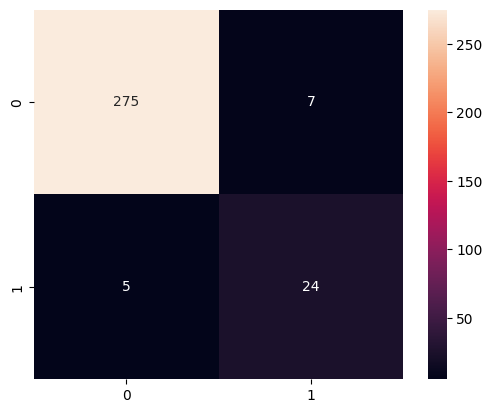

In [12]:
y_pred = classificador_gini.predict(x_teste)

from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_teste,y_pred)

sns.heatmap(matriz_confusao,square = True,annot = True, yticklabels = classificador_gini.classes_, xticklabels = classificador_gini.classes_,fmt = 'd')

In [13]:
path = classificador_gini.cost_complexity_pruning_path(x_treino, y_treino)

ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.         0.00091916 0.00109802 0.00125565 0.00134909 0.00181939
 0.00184162 0.00197316 0.00215852 0.0039357  0.00526177 0.01002762
 0.10886688]


In [14]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'ccp_alpha': ccp_alphas
}

grid = GridSearchCV(classificador_gini, parametros, cv=5)
grid.fit(x_treino, y_treino)

print(f"Melhor valor de k: {grid.best_params_['ccp_alpha']}")
print(f"Melhor classificador: {grid.best_estimator_}")
print(f"Melhor score (médio): {grid.best_score_*100:.2f}%")

classificador_gini = grid.best_estimator_
classificador_gini.fit(x_treino, y_treino)

Melhor valor de k: 0.0018416206261510127
Melhor classificador: DecisionTreeClassifier(ccp_alpha=0.0018416206261510127)
Melhor score (médio): 97.38%


DecisionTreeClassifier(ccp_alpha=0.0018416206261510127)

[Text(0.36363636363636365, 0.9166666666666666, 'Total <= 1.303\ngini = 0.159\nsamples = 724\nvalue = [661, 63]\nclass = 0'),
 Text(0.2727272727272727, 0.75, 'gini = 0.015\nsamples = 649\nvalue = [644, 5]\nclass = 0'),
 Text(0.45454545454545453, 0.75, 'Pokedex ID <= 1.526\ngini = 0.351\nsamples = 75\nvalue = [17, 58]\nclass = 1'),
 Text(0.2727272727272727, 0.5833333333333334, 'Speed <= 0.684\ngini = 0.206\nsamples = 60\nvalue = [7, 53]\nclass = 1'),
 Text(0.18181818181818182, 0.4166666666666667, 'Type_2 <= -1.232\ngini = 0.457\nsamples = 17\nvalue = [6, 11]\nclass = 1'),
 Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 0'),
 Text(0.2727272727272727, 0.25, 'Pokedex ID <= -0.21\ngini = 0.337\nsamples = 14\nvalue = [3, 11]\nclass = 1'),
 Text(0.18181818181818182, 0.08333333333333333, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = 0'),
 Text(0.36363636363636365, 0.08333333333333333, 'gini = 0.165\nsamples = 11\nvalue = [1, 10]\nclass = 1'),
 Text(0.363

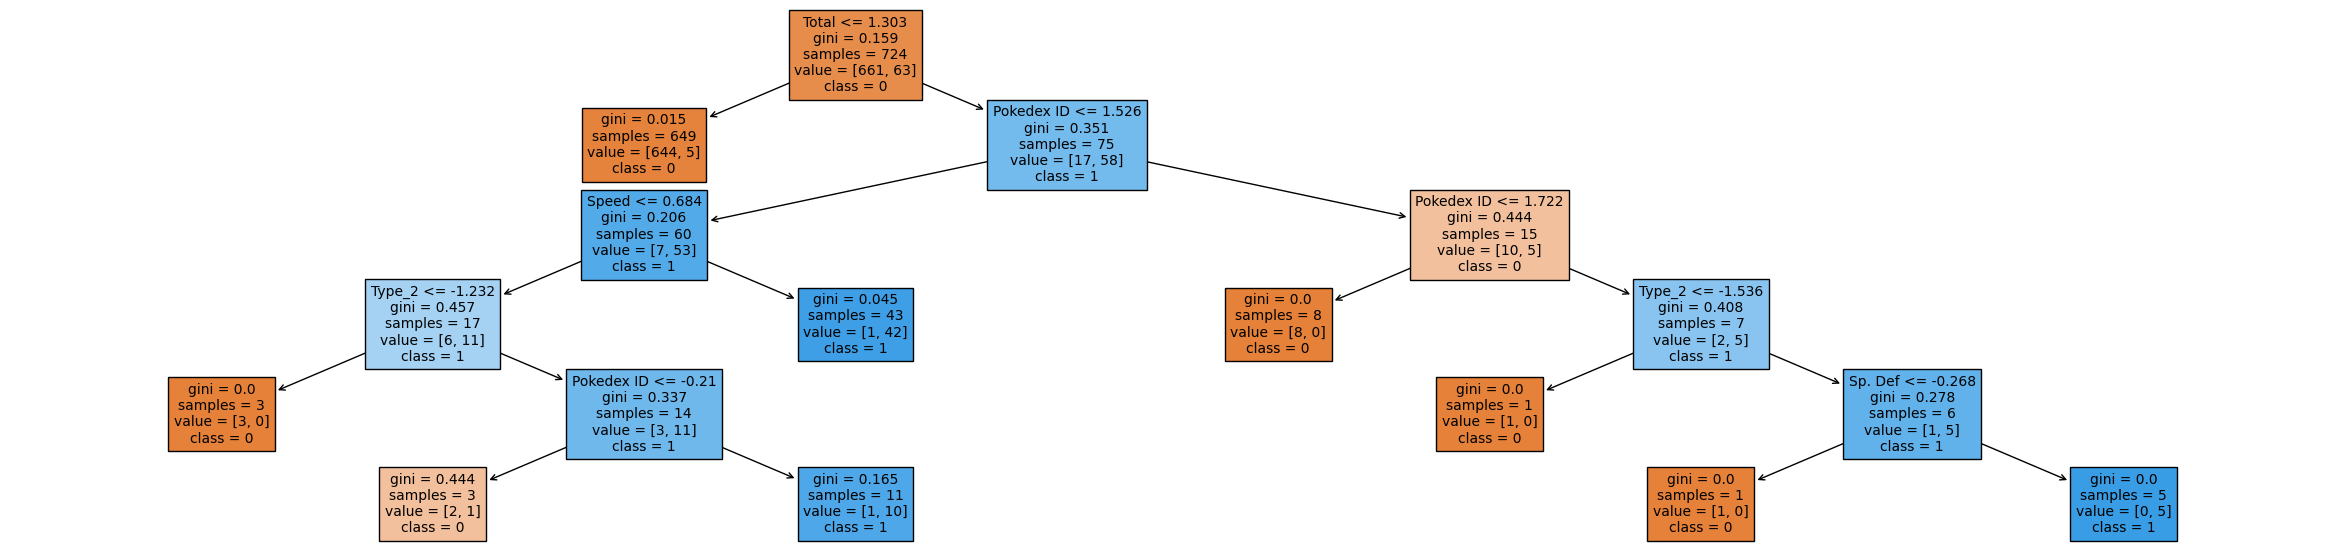

In [15]:
alpha = grid.best_params_['ccp_alpha']

classificador_ccp = tree.DecisionTreeClassifier(ccp_alpha=alpha)
classificador_ccp.fit(x_treino, y_treino)

y_pred = classificador_ccp.predict(x_teste)

plt.figure(figsize=(30,7))
tree.plot_tree(
    classificador_ccp,
    feature_names=x.columns.astype(str),
    class_names=classificador_ccp.classes_.astype(str),
    filled=True
)

<AxesSubplot: >

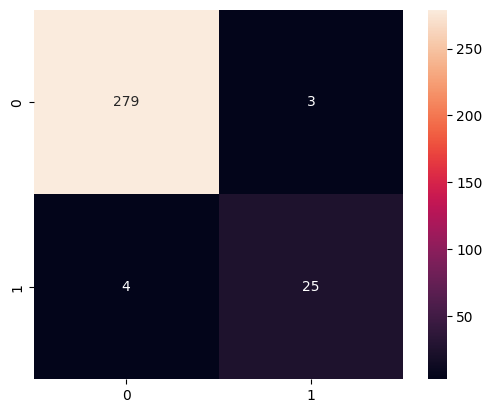

In [16]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_teste,y_pred)

sns.heatmap(matriz_confusao,square = True,annot = True, yticklabels = classificador_ccp.classes_, xticklabels = classificador_ccp.classes_,fmt = 'd')

In [17]:
from sklearn.metrics import classification_report

report = classification_report(y_teste, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       282
           1       0.89      0.86      0.88        29

    accuracy                           0.98       311
   macro avg       0.94      0.93      0.93       311
weighted avg       0.98      0.98      0.98       311



In [18]:
import pickle
import hashlib
import hmac
import os
from dotenv import load_dotenv

load_dotenv()

chave = bytes(os.getenv('senha'), 'utf-8')

In [19]:
def serializar_assinar(modelo, chave, arquivo):    
    modelo_serializado = pickle.dumps({
        'model': modelo,
        'labelencoder': label_encoder
    })

    assinatura = hmac.new(chave, modelo_serializado, hashlib.sha256).digest()

    dados_assinados = modelo_serializado + assinatura

    arquivo.write(dados_assinados)
    
with open('modelo_serializado.pickle', 'wb') as arquivo:
    serializar_assinar(classificador_ccp, chave, arquivo)